In [1]:
#lets import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
#loading dataset to pandas dataframe
sales = pd.read_csv(r"C:\Users\User\Downloads\train.csv")

In [3]:
#print first 5 rows of dataset
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
sales.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [5]:
#getting the statistical information
sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
#datatype info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
#find unique values
sales.apply(lambda x:len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

# EDA

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

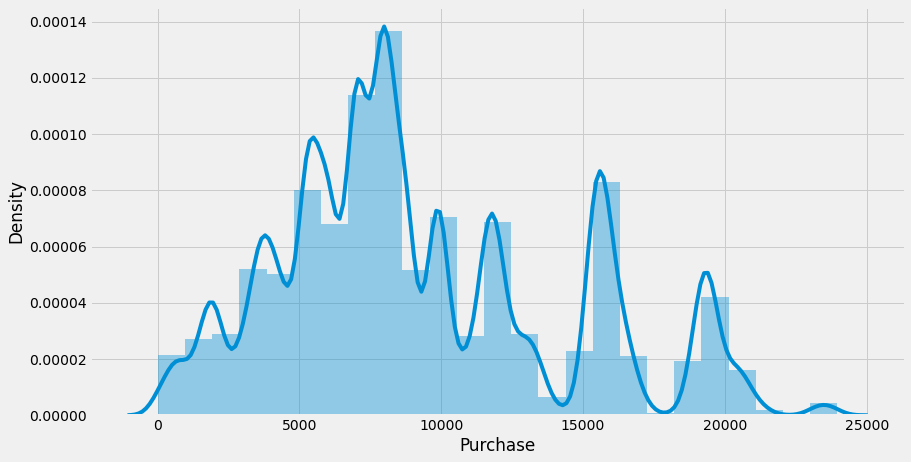

In [13]:
# distplot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(sales['Purchase'], bins=25)

<AxesSubplot:xlabel='Gender', ylabel='count'>

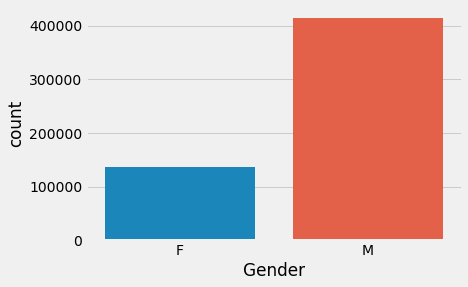

In [14]:
# distribution of numeric variables
sns.countplot(sales['Gender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

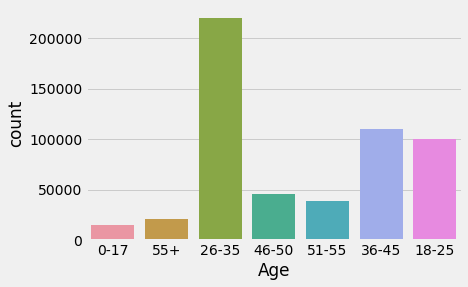

In [15]:
sns.countplot(sales['Age'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

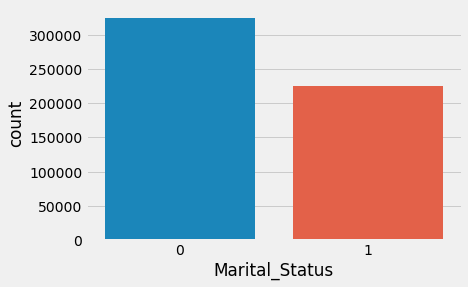

In [16]:
sns.countplot(sales['Marital_Status'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

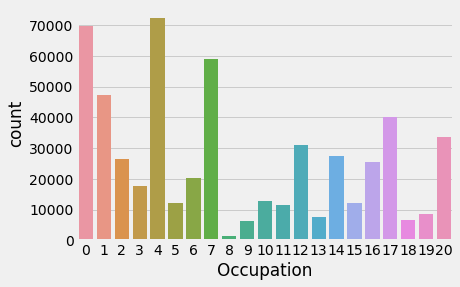

In [17]:
sns.countplot(sales['Occupation'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

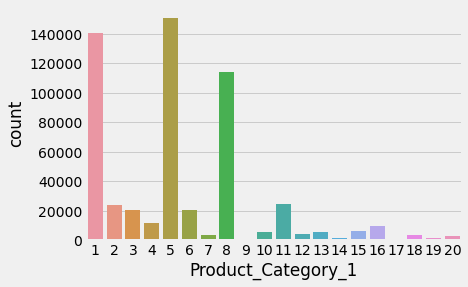

In [18]:
sns.countplot(sales['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

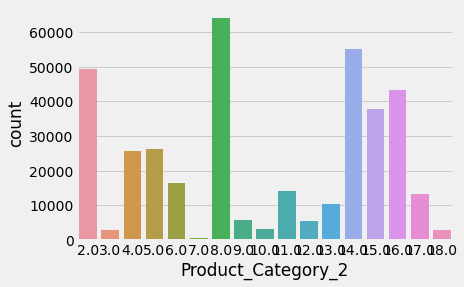

In [19]:
sns.countplot(sales['Product_Category_2'])

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

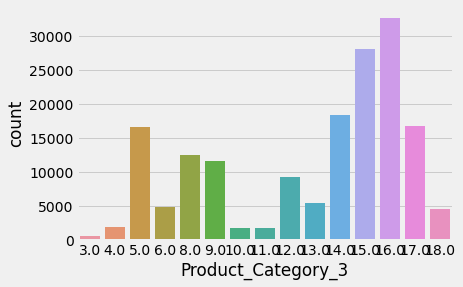

In [21]:
sns.countplot(sales['Product_Category_3'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

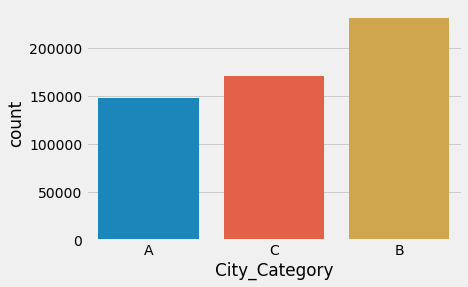

In [22]:
sns.countplot(sales['City_Category'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

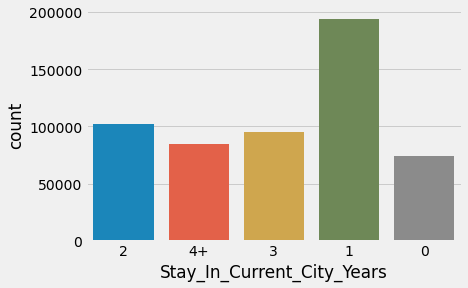

In [23]:
sns.countplot(sales['Stay_In_Current_City_Years'])

## Bivariate Analysis

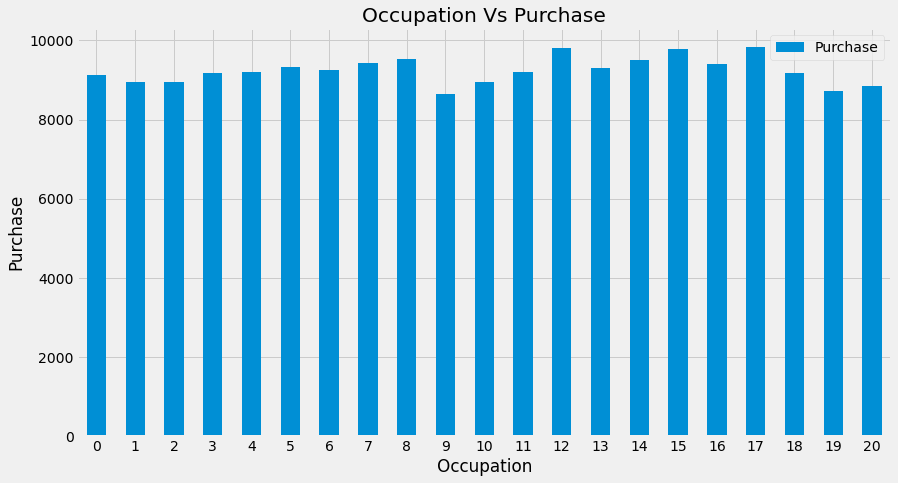

In [24]:
occupation_plot=sales.pivot_table(index='Occupation',values='Purchase',aggfunc=np.mean)
occupation_plot.plot(kind='bar',figsize=(13,7))
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title('Occupation Vs Purchase')
plt.xticks(rotation=0)
plt.show()

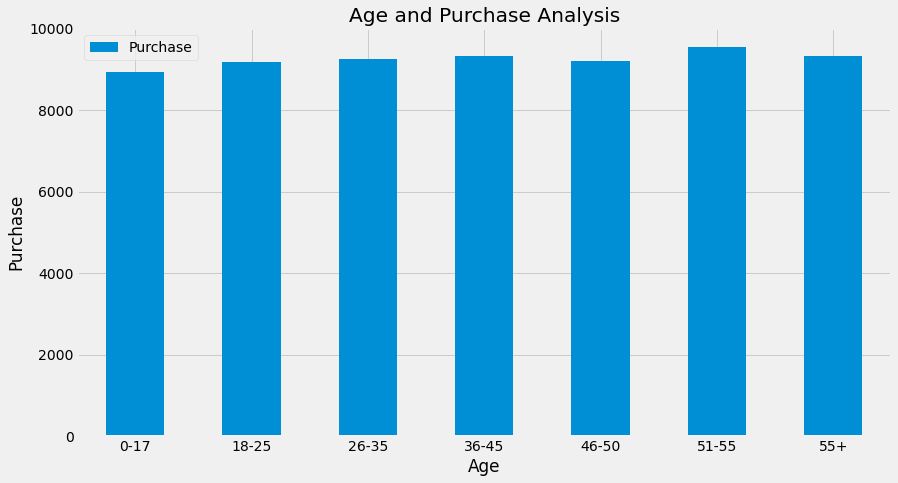

In [26]:
age_plot = sales.pivot_table(index='Age',values='Purchase',aggfunc=np.mean)
age_plot.plot(kind='bar',figsize=(13,7))
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

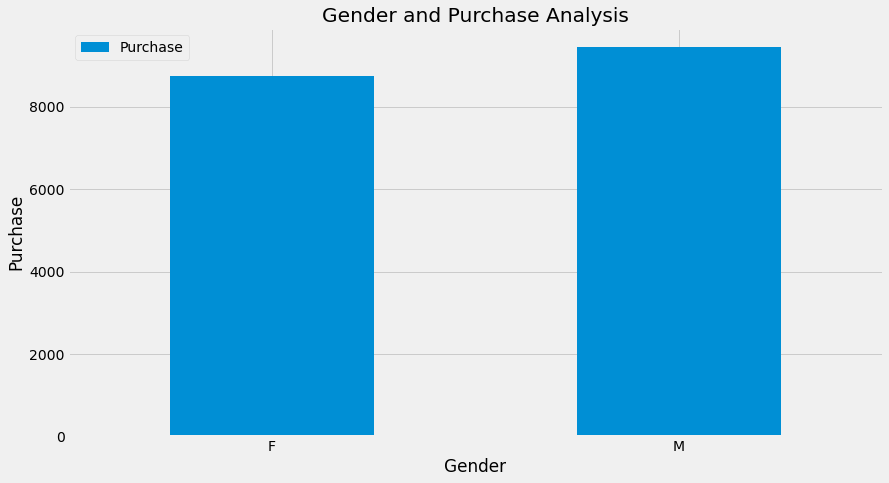

In [28]:
gender_plot = sales.pivot_table(index='Gender',values='Purchase',aggfunc=np.mean)
gender_plot.plot(kind='bar',figsize=(13,7))
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

# PreProcessing datasets

In [29]:
#finding the null values
sales.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [30]:
sales['Product_Category_2'] = sales['Product_Category_2'].fillna(-2.0).astype("float32")
sales['Product_Category_3'] = sales['Product_Category_3'].fillna(-2.0).astype("float32")

In [31]:
sales.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [32]:
#encoding the values using dict
gender_dict = {'F':0,'M':1}
sales['Gender'] = sales['Gender'].apply(lambda x:gender_dict[x])
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [35]:
#to improve the metrics lets use one hot encoding
cols =['Age','City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    sales[col] = le.fit_transform(sales[col])
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


## Correlation Matrix

In [36]:
corr = sales.corr()

<AxesSubplot:>

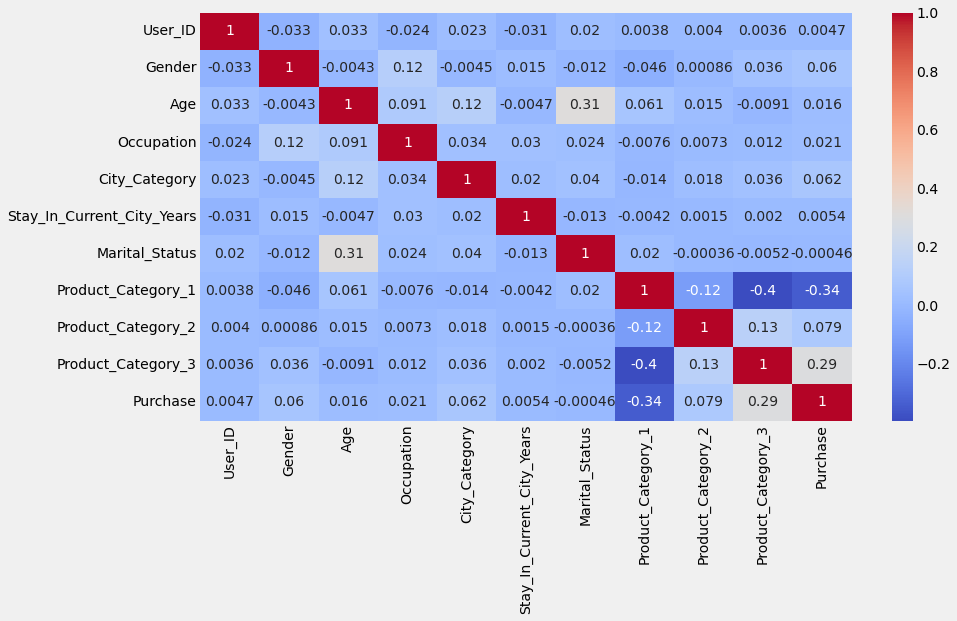

In [38]:
plt.figure(figsize=(13,7))
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Splitting the data into feature & Target

In [39]:
X = sales.drop(columns=['User_ID','Product_ID','Purchase'],axis=1)
Y = sales['Purchase']

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [42]:
def train(model,X,Y):
    #train test split
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
    model.fit(X_train,Y_train)
    
    #predict the results
    pred = model.predict(X_test)
    
    #cross validation
    cv_score = cross_val_score(model,X,Y,scoring='neg_mean_squared_error',cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:",np.sqrt(mean_squared_error(Y_test,pred)))
    print("CV Score: ",np.sqrt(cv_score))

Results
MSE: 4617.99403420172
CV Score:  4625.252945835686


<AxesSubplot:title={'center':'Model Co-efficients'}>

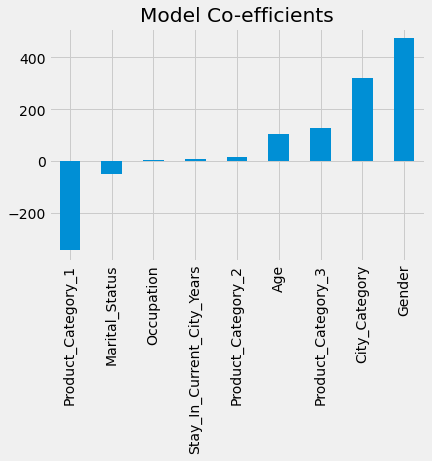

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model,X,Y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Co-efficients')

Results
MSE: 3364.2301871576046
CV Score:  3340.127852501054


<AxesSubplot:title={'center':'Feature Importance'}>

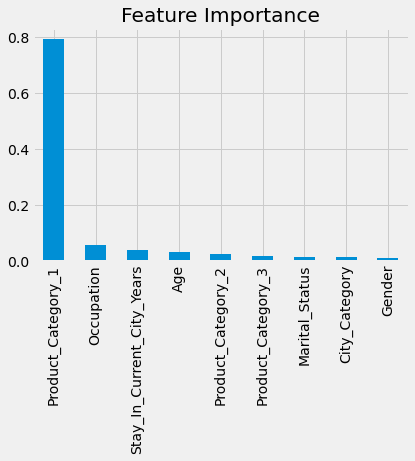

In [48]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X,Y)
features = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
features.plot(kind='bar',title='Feature Importance')

Results
MSE: 3064.38639385422
CV Score:  3052.1643081557986


<AxesSubplot:title={'center':'Feature Importance'}>

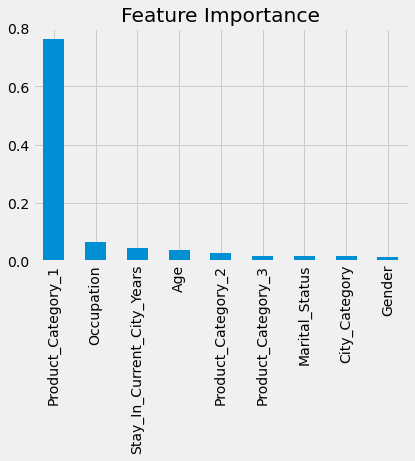

In [52]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train(model,X,Y)
features = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
features.plot(kind='bar',title='Feature Importance')

Results
MSE: 3195.020267645205
CV Score:  3180.0667614516706


<AxesSubplot:title={'center':'Feature Importance'}>

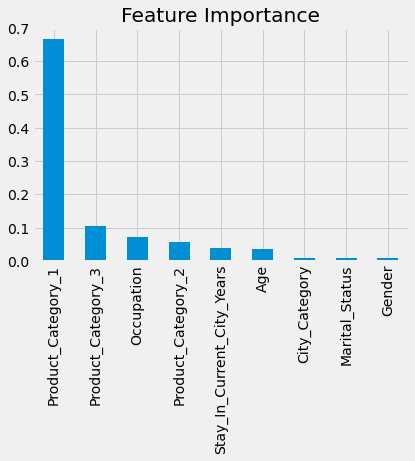

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs=-1)
train(model,X,Y)
features = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
features.plot(kind='bar',title='Feature Importance')